Importanto bibliotecas necessárias

In [443]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Introdução


**Contextualização**


**Tema e Objetivo**


**Base de Dados**


# Manipulando as planilhas de dados

In [444]:
dados_popmunicipio0 =  pd.read_excel('planilhas/População_Residente_por_Múnicipio.xlsx')
dados_pib0 = pd.read_excel('planilhas/Pib_per_capita_por_municipio.xlsx')
dados_idososcasas0 = pd.read_excel('planilhas/Porcentagem_de_Idosos_nas_Casas.xlsx')
dados_desemprego0 = pd.read_excel('planilhas/Taxa_de_desemprego.xlsx')
dados_analfabetismo0 = pd.read_excel('planilhas/Taxa_de_anafalbetismo.xlsx')
dados_coberturavacinal0 = pd.read_excel('planilhas/Cobertura_vacinal.xlsx')
dados_cobequipessaudebasica0 = pd.read_excel('planilhas/Cobertua_equipe_ atenção_básica_por_Município.xlsx')
dados_pessoasbaixarenda0 = pd.read_excel('planilhas/Porcentagem_de_Pessoas_Baixa_Renda.xlsx')
dados_idadepopulacional0 = pd.read_excel('planilhas/Idade_população.xlsx')
dados_tuberculose0 = pd.read_excel('planilhas/Tuberculose.xlsx')
dados_tuber_vacinacao0 = pd.read_excel('planilhas/tuberculose vacinacao.xlsx')
dados_HIV0 = pd.read_excel('planilhas/AIDS.xlsx')


### Limpando as planilhas de dados

In [445]:
#Função de limpeza
#Função que separa o código do nome do município
def separa_codigo(planilha):
    colunas = list(planilha)
    if "Município" in colunas:
        planilha[['Código do Município', 'Nome do Município']] = planilha['Município'].str.split(' ', n=1, expand=True)
        plan = planilha.drop('Município', axis=1)
        planilha_limpa = plan.drop('Nome do Município', axis=1)
    else: 
        planilha_limpa = planilha_limpa
    return planilha_limpa



#função de limpeza que substitui valores nulos (dados por -) por zero
def exclui_valor_hifen(planilha):
    return planilha.replace('-', '0')

In [446]:
dados_HIV

,Freqüência,Código do Município
0,1,110001
1,2,110037
2,5,110040
3,20,110002
4,1,110045
...,...,...
2901,2,522205
2902,1,522220
2903,1,520220
2904,3,520000


- Limpando dados do DataSus

In [447]:
#Limpa linhas inúteis

df_popmunicipio = dados_popmunicipio0.drop(dados_popmunicipio0.index[-4:])
df_pib = dados_pib0.drop(dados_pib0.index[-11:])
df_idososcasas= dados_idososcasas0.drop(dados_idososcasas0.index[-4:])
df_desemprego = dados_desemprego0.drop(dados_desemprego0.index[-8:])
df_analfabetismo = dados_analfabetismo0.drop(dados_analfabetismo0.index[-4:])
df_coberturavacinal = dados_coberturavacinal0.drop(dados_coberturavacinal0.index[-3:])
df_cobequipessaudebasica = dados_cobequipessaudebasica0.drop(dados_cobequipessaudebasica0.index[-22:])
df_pessoasbaixarenda = dados_pessoasbaixarenda0.drop(dados_pessoasbaixarenda0.index[-10:])
df_HIV = dados_HIV0.drop(dados_HIV0.index[-1:])


#Separa os códios dos nomes e deixa as planilhas prontas para mergir
df_popmunicipio[['Código do Município', 'Nome do Município']] = df_popmunicipio['Município'].str.split(' ', n=1, expand=True)
dados_popmunicipio = df_popmunicipio.drop('Município', axis=1)
dados_pib = separa_codigo(df_pib)
dados_desemprego = separa_codigo(df_desemprego)
dados_analfabetismo = separa_codigo(df_analfabetismo)
dados_coberturavacinal = separa_codigo(df_coberturavacinal)
dados_cobequipessaudebasica = separa_codigo(df_cobequipessaudebasica)
dados_pessoasbaixarenda = separa_codigo(df_pessoasbaixarenda)
dados_idadepopulacional = separa_codigo(dados_idadepopulacional0)
dados_tuberculose = separa_codigo(dados_tuberculose0)
dados_vacinabcg = separa_codigo(dados_tuber_vacinacao0)
dados_HIV = separa_codigo(df_HIV)



In [448]:
dados_popmunicipio

,População_residente,Código do Município,Nome do Município
0,24958.0,110001,ALTA FLORESTA D'OESTE
1,92448.0,110002,ARIQUEMES
2,6459.0,110003,CABIXI
3,80396.0,110004,CACOAL
4,17424.0,110005,CEREJEIRAS
...,...,...,...
5565,12774.0,522200,VIANOPOLIS
5566,7506.0,522205,VICENTINOPOLIS
5567,4820.0,522220,VILA BOA
5568,5238.0,522230,VILA PROPICIO


- Limpando dados do IBGE

In [449]:
dados_IBGE = pd.read_excel('planilhas/IDH IBGE.xlsx')
dados_SAUDE = pd.read_excel('planilhas/IBGE_2010_saude_total.xlsx')
del dados_IBGE['Código da Unidade da Federação']
del dados_IBGE['Código IBGE da Mesoregião']
del dados_IBGE['Nome da Mesoregião']
del dados_IBGE['Código IBGE da Microregião']
del dados_IBGE['IDHM 1991']
del dados_IBGE['IDHM 2000']
del dados_IBGE['Nome da Microregião']

c:\Users\rafal\anaconda3\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


##### **Merging das bases de dados**

In [450]:
#Mergindo as planilhas do IBGE
result = pd.merge(dados_IBGE, dados_SAUDE, how='inner', on='Código IBGE do Município')
#Renomeando a coluna com os códigos de município
result.rename(columns={'Código IBGE do Município': 'Código do Município'}, inplace=True)
result["Código do Município"] = result["Código do Município"] .astype(str)
result_1 = pd.merge(dados_pib, dados_popmunicipio, how='inner', on='Código do Município')
result_4 = pd.merge(result_1, dados_analfabetismo, how='inner', on='Código do Município')
result_5 = pd.merge(result_4, dados_desemprego, how='inner', on='Código do Município')
result_7 = pd.merge(result_5, dados_coberturavacinal, how='inner', on='Código do Município')
result_8 = pd.merge(result_7, dados_pessoasbaixarenda, how='inner', on='Código do Município')
result_10 = pd.merge(result_8, dados_tuberculose, how='inner', on='Código do Município')
result_11 = pd.merge(result_10, result, how='inner', on='Código do Município')
result_12 = pd.merge(result_11, dados_idadepopulacional, how='inner', on='Código do Município')
result_13 = pd.merge(result_12, dados_HIV, how='inner', on='Código do Município')
result_14 = pd.merge(result_13, dados_vacinabcg, how='inner', on='Código do Município')




In [451]:
result_14

,PIB_per_capita,Código do Município,População_residente,Nome do Município,Taxa_de_analfabetismo,Taxa_de_desemprego_16a_e+,Coberturas Vacinais,%_população_com_renda_,Casos de Tuberculose,Sigla da Unidade da Federação,...,IDHM 2010,Estabelecimentos de Saúde privado total,Estabelecimentos de Saúde público total,Menor 1 ano,1 a 4 anos,60 a 69 anos,70 a 79 anos,80 anos e mais,Freqüência,BCG
0,10725.97,110001,24958.0,ALTA FLORESTA D'OESTE,12.0,5.01,83.802871,48.42,4,RO,...,0.641,4,7,371,1511,1211,680,169,1,445
1,15070.14,110002,92448.0,ARIQUEMES,7.9,4.64,75.505515,31.05,32,RO,...,0.702,22,12,1447,6015,3772,1842,642,20,1896
2,15068.72,110004,80396.0,CACOAL,8.3,5.87,78.515834,32.10,27,RO,...,0.718,21,9,1222,4642,3665,2055,818,9,1366
3,13024.11,110005,17424.0,CEREJEIRAS,10.4,5.24,88.863966,36.99,3,RO,...,0.692,4,7,254,968,976,514,174,1,193
4,10835.74,110009,29395.0,ESPIGAO D'OESTE,9.4,4.51,74.984627,37.43,2,RO,...,0.672,2,9,512,1899,1400,689,243,1,423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2367,16514.67,522180,3125.0,URUTAI,7.9,5.74,80.200000,29.44,2,GO,...,0.732,1,1,27,152,256,128,49,2,28
2368,8740.02,522185,133463.0,VALPARAISO DE GOIAS,3.4,6.97,78.555988,28.50,19,GO,...,0.746,9,31,2588,9834,4142,1924,654,25,3432
2369,13637.07,522200,12774.0,VIANOPOLIS,8.7,3.44,74.203219,25.08,1,GO,...,0.712,3,5,168,710,754,415,180,1,184
2370,15932.41,522220,4820.0,VILA BOA,16.9,8.16,86.834951,52.93,2,GO,...,0.647,0,4,89,378,195,82,28,1,71


In [452]:
sem_hifen = exclui_valor_hifen(result_14)
sem_na = sem_hifen.fillna(0)
df = sem_na.drop(sem_na.index[-5:])



In [453]:
# result["Total de estabelecimentos de saúde"] = result["Estabelecimentos de Saúde privado total"] + result["Estabelecimentos de Saúde público total"]

##### **Bases de dados**

In [454]:
df.shape

(2367, 21)

In [455]:
df2 = df.copy()

In [456]:
df2

,PIB_per_capita,Código do Município,População_residente,Nome do Município,Taxa_de_analfabetismo,Taxa_de_desemprego_16a_e+,Coberturas Vacinais,%_população_com_renda_,Casos de Tuberculose,Sigla da Unidade da Federação,...,IDHM 2010,Estabelecimentos de Saúde privado total,Estabelecimentos de Saúde público total,Menor 1 ano,1 a 4 anos,60 a 69 anos,70 a 79 anos,80 anos e mais,Freqüência,BCG
0,10725.97,110001,24958.0,ALTA FLORESTA D'OESTE,12.0,5.01,83.802871,48.42,4,RO,...,0.641,4,7,371,1511,1211,680,169,1,445
1,15070.14,110002,92448.0,ARIQUEMES,7.9,4.64,75.505515,31.05,32,RO,...,0.702,22,12,1447,6015,3772,1842,642,20,1896
2,15068.72,110004,80396.0,CACOAL,8.3,5.87,78.515834,32.10,27,RO,...,0.718,21,9,1222,4642,3665,2055,818,9,1366
3,13024.11,110005,17424.0,CEREJEIRAS,10.4,5.24,88.863966,36.99,3,RO,...,0.692,4,7,254,968,976,514,174,1,193
4,10835.74,110009,29395.0,ESPIGAO D'OESTE,9.4,4.51,74.984627,37.43,2,RO,...,0.672,2,9,512,1899,1400,689,243,1,423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2362,11420.07,522045,85952.0,SENADOR CANEDO,6.7,7.45,75.396807,29.41,23,GO,...,0.701,8,22,1582,6110,3092,1550,540,17,1461
2363,28136.22,522050,7616.0,SERRANOPOLIS,11.6,5.43,79.092640,26.86,1,GO,...,0.681,1,6,108,433,523,253,103,2,17
2364,9692.32,522140,106376.0,TRINDADE,7.5,6.06,76.318159,28.35,14,GO,...,0.699,10,27,1610,6282,5610,2947,1036,21,1495
2365,11884.03,522150,4922.0,TURVANIA,11.6,5.41,87.412935,36.29,1,GO,...,0.697,1,2,53,214,402,232,85,1,45


In [457]:
# Lista de capitais desejadas
seu_dataframe = df2
capitais_desejadas = [
    "RIO BRANCO", "MACEIO", "MACAPA", "MANAUS", "SALVADOR",
    "FORTALEZA", "BRASILIA", "VITORIA", "GOIANIA", "SAO LUIS",
    "CUIABA", "CAMPO GRANDE", "BELO HORIZONTE", "BELEM", "JOAO PESSOA",
    "CURITIBA", "RECIFE", "TERESINA", "RIO DE JANEIRO", "NATAL",
    "PORTO ALEGRE", "PORTO VELHO", "BOA VISTA", "FLORIANOPOLIS",
    "SAO PAULO", "ARACAJU", "PALMAS"
]

# Selecionar apenas as linhas correspondentes às capitais desejadas
df_selecionado = seu_dataframe[seu_dataframe['Nome do Município'].isin(capitais_desejadas)]

df2 = df_selecionado

In [458]:
# quant = ['PIB_per_capita', 'Trat.Água_Filtrada', 'População_residente', '%idosos_resid_como_out_parente', 
#        'Taxa_de_analfabetismo','Taxa_de_desemprego_16a_e+', 'Coberturas Vacinais', '%_população_com_renda_', 
#        'IDHM 2010','Estabelecimentos de Saúde privado total','Estabelecimentos de Saúde público total', 'Menor 1 ano', '1 a 4 anos',
#        '60 a 69 anos', '70 a 79 anos', '80 anos e mais', 'Diabéticos',
#        'PPL', 'Moradores de rua', 'Alcolismo',
#        'Tabagismo', 'Doenças pré-existentes', 'BCG',
#        'Óbito por tuberculose', 'Casos de Tuberculose']
# var_quantitativas = df2[quant]
# var_quantitativas.head()

In [459]:
# #Transformando colunas MIXED em float (sim, eu fiz na mão porque não to sabendo pensar)
# var_quantitativas['Jogado em terreno baldio ou logradouro'] = var_quantitativas['Jogado em terreno baldio ou logradouro'].astype(float)
# var_quantitativas['Jogado em rio, lago ou mar'] = var_quantitativas['Jogado em rio, lago ou mar'].astype(float)

In [460]:
#função relativiza per capta
def relativiza(planilha):
    
    quantitativas = ['Estabelecimentos de Saúde privado total',
                    'Estabelecimentos de Saúde público total',  'Menor 1 ano', '1 a 4 anos',
       '60 a 69 anos', '70 a 79 anos', '80 anos e mais', 'BCG',
       'Casos de Tuberculose', 'Freqüência']
    
    for variavel in quantitativas:
        planilha[variavel] = planilha[variavel].astype(float)
        

    # Substituindo as colunas pela divisão
    for coluna in quantitativas:
        planilha[coluna] = planilha[coluna] / df2['População_residente']

    return planilha



var_quantitativas = relativiza(df2)

C:\Users\rafal\AppData\Local\Temp\ipykernel_14352\3328140353.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  planilha[variavel] = planilha[variavel].astype(float)
C:\Users\rafal\AppData\Local\Temp\ipykernel_14352\3328140353.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  planilha[coluna] = planilha[coluna] / df2['População_residente']


In [461]:
quant = ['PIB_per_capita', 'População_residente', 
       'Taxa_de_analfabetismo','Taxa_de_desemprego_16a_e+', 'Coberturas Vacinais', '%_população_com_renda_', 
       'IDHM 2010','Estabelecimentos de Saúde privado total','Estabelecimentos de Saúde público total', 'Menor 1 ano', '1 a 4 anos',
       '60 a 69 anos', '70 a 79 anos', '80 anos e mais', 'BCG', 
     'Casos de Tuberculose','Freqüência']
var_quantitativas = df2[quant]
var_quantitativas.head()

,PIB_per_capita,População_residente,Taxa_de_analfabetismo,Taxa_de_desemprego_16a_e+,Coberturas Vacinais,%_população_com_renda_,IDHM 2010,Estabelecimentos de Saúde privado total,Estabelecimentos de Saúde público total,Menor 1 ano,1 a 4 anos,60 a 69 anos,70 a 79 anos,80 anos e mais,BCG,Casos de Tuberculose,Freqüência
11,21231.04,438458.0,5.2,5.63,76.445173,25.30,0.736,0.000338,0.000146,0.017372,0.065942,0.035093,0.015461,0.006354,0.019384,0.000757,0.000438
28,15252.38,350589.0,8.9,8.69,74.567700,38.50,0.727,0.000211,0.000260,0.018606,0.071237,0.036567,0.018255,0.009108,0.025945,0.000636,0.000111
49,27861.98,1837786.0,3.9,10.79,72.761121,37.78,0.737,0.000109,0.000163,0.019007,0.072361,0.035809,0.017201,0.007753,0.026505,0.001120,0.000531
63,18017.52,289576.0,5.7,7.33,69.864910,34.81,0.752,0.000193,0.000193,0.020185,0.077151,0.031853,0.014538,0.006734,0.022426,0.000466,0.000477
85,13346.95,1426831.0,3.3,10.07,76.952750,36.23,0.746,0.000196,0.000070,0.014379,0.056204,0.051898,0.027314,0.012963,0.021822,0.001272,0.000388


In [462]:
len(var_quantitativas)

28

<AxesSubplot:>

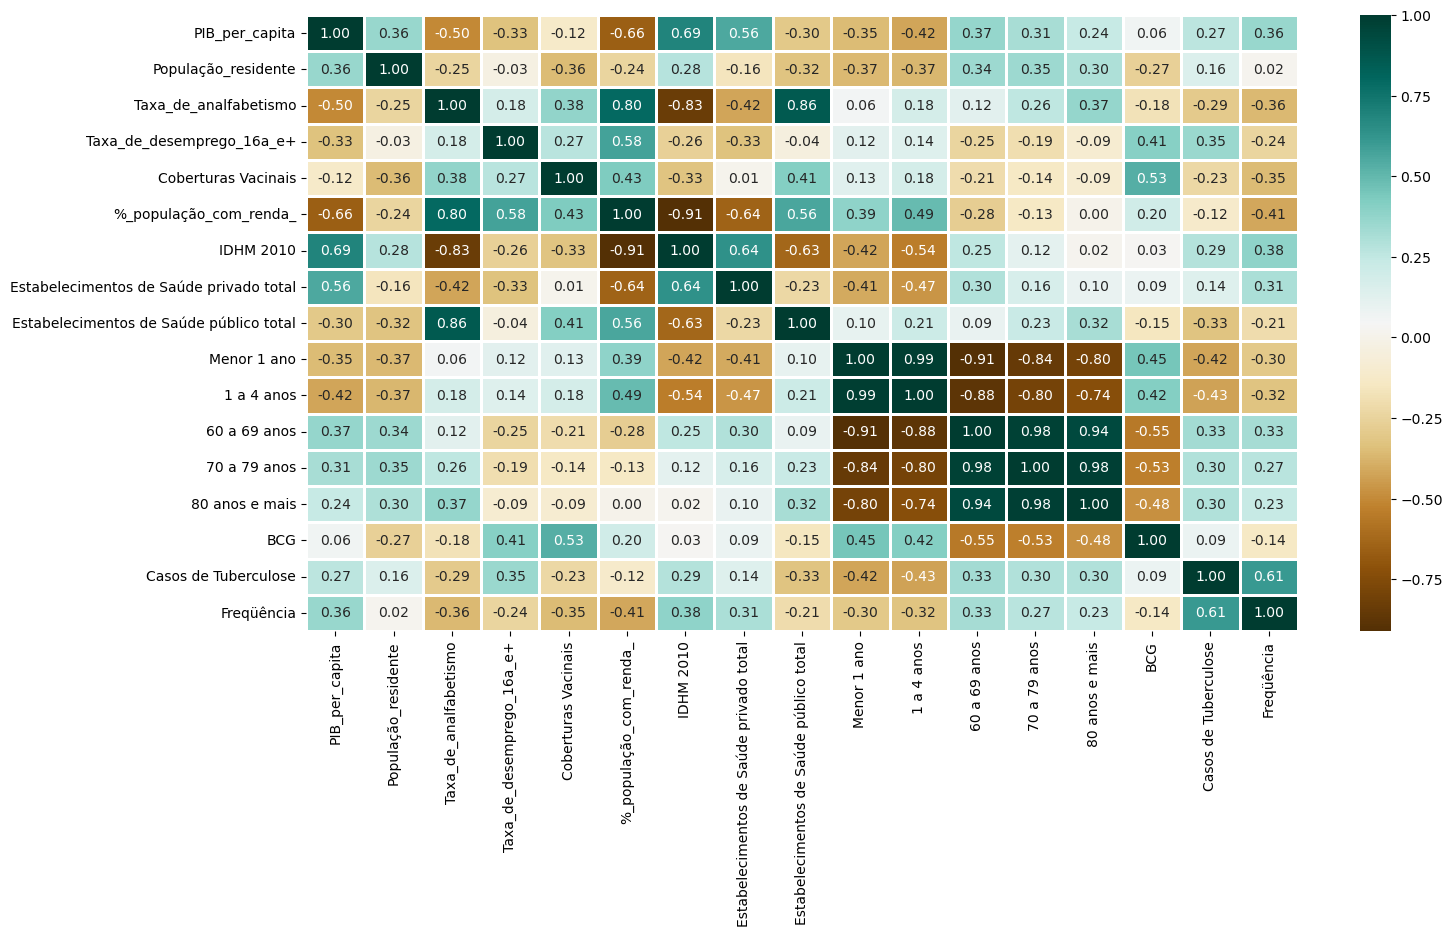

In [463]:
plt.figure(figsize=(16, 8))
sns.heatmap(var_quantitativas.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

### Dicionário:

- **Jogado em terreno baldio ou logradouro:** Número de moradores por lixo jogado em terreno baldio ou logradouro
- **Jogado em rio, lago ou mar:** Número de moradores por lixo jogado em rio, lago ou mar
- **Cobertura Vacinal** Porcentagem de Vacinas com Cobertura Adequada por município



**Estrutura do Projeto**

Serão exploradas técnicas de regressão para a previsão da variável quantitativa "Quantidade de Desistência no Curso". A qualidade da comunicação e apresentação dos resultados também será uma prioridade, assegurando que os resultados sejam compreensíveis para um público amplo.

Este projeto tem como objetivo fornecer previsões robustas e ir além de uma simples análise exploratória de dados. Espera-se que a análise e modelos desenvolvidos ajudem a entender e prever as desistências em cursos de graduação, o que pode ter implicações importantes na melhoria da Educação Superior.

### Merge dos Dados

# Pergunta

Com base no arquivo de 2008, a gente vê se aqueles fatores ainda estão influenciando em 2010


### Data Processing

# Minerando Dados e Características do Dataset

# Modelos de Predição

# Processo e Estatísticas de Validação

# Conclusão 

# Referências Bibliográficas